In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import neighbors
%matplotlib inline


In [12]:
df = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\beers.csv')
print(df.head(10))

   Unnamed: 0    abv  ibu    id                 name  \
0           0  0.050  NaN  1436             Pub Beer   
1           1  0.066  NaN  2265          Devil's Cup   
2           2  0.071  NaN  2264  Rise of the Phoenix   
3           3  0.090  NaN  2263             Sinister   
4           4  0.075  NaN  2262        Sex and Candy   
5           5  0.077  NaN  2261         Black Exodus   
6           6  0.045  NaN  2260  Lake Street Express   
7           7  0.065  NaN  2259              Foreman   
8           8  0.055  NaN  2258                 Jade   
9           9  0.086  NaN  2131         Cone Crusher   

                            style  brewery_id  ounces  
0             American Pale Lager         408    12.0  
1         American Pale Ale (APA)         177    12.0  
2                    American IPA         177    12.0  
3  American Double / Imperial IPA         177    12.0  
4                    American IPA         177    12.0  
5                   Oatmeal Stout         177  

In [13]:
df = df.dropna()
print(df.head(10))

    Unnamed: 0    abv   ibu    id  \
14          14  0.061  60.0  1979   
21          21  0.099  92.0  1036   
22          22  0.079  45.0  1024   
24          24  0.044  42.0   876   
25          25  0.049  17.0   802   
26          26  0.049  17.0   801   
27          27  0.049  17.0   800   
28          28  0.070  70.0   799   
29          29  0.070  70.0   797   
30          30  0.070  70.0   796   

                                           name                    style  \
14                                 Bitter Bitch  American Pale Ale (APA)   
21                                Lower De Boom      American Barleywine   
22                                Fireside Chat            Winter Warmer   
24                              Bitter American  American Pale Ale (APA)   
25         Hell or High Watermelon Wheat (2009)   Fruit / Vegetable Beer   
26         Hell or High Watermelon Wheat (2009)   Fruit / Vegetable Beer   
27  21st Amendment Watermelon Wheat Beer (2006)   Fruit / Ve

In [17]:
df['ABV_Perc']= df['abv']*100

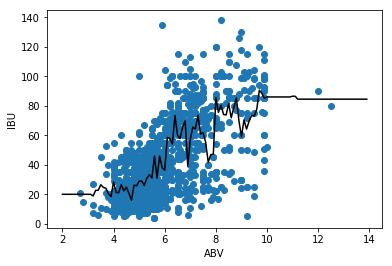

In [25]:
knn = neighbors.KNeighborsRegressor (n_neighbors = 10, weights='uniform')

X = pd.DataFrame(df['ABV_Perc'])
Y = df['ibu']
knn.fit(X,Y)

T = np.arange(2, 14, .1) [:,np.newaxis]
Y_ = knn.predict(T)

plt.scatter(X,Y)
plt.xlabel('ABV')
plt.ylabel('IBU')
plt.plot(T,Y_, color = 'black')
plt.show()

##KNN regression plots seem volatile compared to OLS

Coefficients: 
 [12.81860757]
Intercept: 
 -34.06764533520671


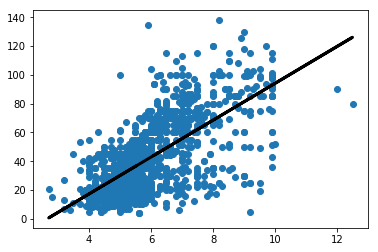

In [36]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(X, Y)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)


plt.scatter (X, Y)
plt.plot(X, regr.predict(X), linewidth=3, color='black')
plt.show()

##OLS gives a better line. I'm not sure why you would prefer KNN regression